## Follow the comment prompts to train a neural network

In [ ]:
# very common imports
from math import floor
import numpy as np
from numpy.dtypes import StringDType
import pandas as pd
import matplotlib.pyplot as plt

# common torch imports
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torchvision.transforms import v2

# common sklearn imports 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score

In [7]:
# we will not have a gpu accessible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
if not torch.cuda.is_available():
    print("CUDA is NOT available to Pytorch")
print(device)

CUDA is NOT available to Pytorch
cpu


In [8]:
means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
transform_pipeline = v2.Compose([
    v2.ToImage(),
    v2.ToDtype(torch.float32, scale=True),
    v2.Normalize(mean=means, std=stds)
])

In [ ]:
# TO DO
# Create some data with the `simulate-exercise.ipynb` file
# Start small, and `ls -lh` to check how big the data is
# Modify the file names below accordingly 

# load the data
target_color = np.loadtxt('../data/target_color_small.txt', dtype=StringDType)
target_shape = np.loadtxt('../data/target_shape_small.txt', dtype=StringDType)
images = np.load('../data/images_small.npy')
images = torch.tensor(images).permute(0,3,1,2)

In [ ]:
# label encode the targets
# so that the target is numeric

# TO DO
# Choose to model target_color or target_shape
# color is much easier than shape!
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

target = 
encoder = 
encoder.fit(target)
target_encoded = encoder.transform(target)

In [ ]:
# TO DO
# perform the train test split
# so that we evaluate the model
# on held out data
# use this function
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html





# convert data to torch tensors
X_train = transform_pipeline(X_train)
X_test = transform_pipeline(X_test)
y_train = torch.tensor(y_train)
y_test = torch.tensor(y_test)

In [ ]:
# set up the data loader
# which is so we update the model
# in batches

# TO DO
# Experiment with different batch sizes
# You may require larger batch sizes than in Exercise 1

batch_size = 2 ** 7


# TO DO
# Define the dataset loader as train_loader and test_loader
# https://docs.pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader

train_data = TensorDataset(X_train, y_train)
test_data = TensorDataset(X_test, y_test)



In [ ]:
# build a model class
# https://docs.pytorch.org/docs/stable/nn.html

# first, build a model without pooling layers
# second, add pooling layers
# third, add normalization and dropout layers
# optional, play with activation functions

# define the cnn math for the size of the next layer
# if building complicated models

def calculate_after_conv(height, kernel_size, stride, padding,):
    return floor((height + 2 * padding - kernel_size) / stride) + 1


# first, for the shape classifier
class MyCNN(nn.Module):
    '''Custom CNN to classify shapes in images'''

    def __init__(self,
                    num_classes,
                    height,
                    width,
                    input_channels,
                    cnn_channels_1,
                    cnn_channels_2,
                    hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1,
                    pooling=2,
                    dropout=0,
                ):
        '''Initialize the model

        Parameters
        ----------
        num_classes : int
            Number of prediction classes
        height : int
        width : int
            Dimensions of image
        input_channels : int
            Number of channels in input (3 for RGB color)
        cnn_channels_1 : int
            Number of channels in first Conv2d()
        cnn_channels_2 : int
            Number of channels in second Conv2d()
        hidden_unit : int
            Number of hidden units in Linear() layer
        kernel_size : int
        stride : int
        padding : int
        pooling : int
        '''

        # must have this
        # inherits the internal attributes 
        # and methods of nn.Module
        # which is a lot of machinery
        # that we do not want to write
        # from scratch
        super(MyCNN, self).__init__()

        self.num_classes_ = num_classes

        # convolutional layers
        self.conv1 = nn.Conv2d(
            input_channels,
            # TO DO
            # Which arguments go here
        )

        # TO DO
        # Define a batch normalization 2d layer
        self.bn1 = 

        # TO DO
        # Define a max or average pooling 2d layer
        self.pool1 = 


        self.conv2 = nn.Conv2d(
            # TO DO
            # Which arguments go here
        )

        # TO DO
        # Define a batch normalization 2d layer
        self.bn1 = 

        # TO DO
        # Define a max or average pooling 2d layer
        self.pool1 = 


        # Compute size for dimensionality of first linear layer
        # TO DO
        # Update the height and width to be compatible with next Linear() layer
        height = calculate_after_conv(height, kernel_size, stride, padding)
        height = calculate_after_conv(height, pooling, pooling, 0)
        height = calculate_after_conv(height, kernel_size, stride, padding)
        height = calculate_after_conv(height, pooling, pooling, 0)
        width = calculate_after_conv(width, kernel_size, stride, padding)
        width = calculate_after_conv(width, pooling, pooling, 0)
        width = calculate_after_conv(width, kernel_size, stride, padding)
        width = calculate_after_conv(width, pooling, pooling, 0)


        # linear layers
        self.linear1 = nn.Linear(
            width * height * cnn_channels_2,
            hidden_units,
        )
        self.bn3 = nn.BatchNorm1d(hidden_units)
        self.linear2 = nn.Linear(
            hidden_units,
            num_classes,
        )
        self.dropout_ = nn.Dropout(dropout)

    def forward(self, x):
        '''Where we specify the order of neural network layers

        Parameters
        ----------
        x : torch.Tensor
            Tensor of shape (batch_size, in_channels, height, width)
        
        Returns
        -------
        torch.Tensor
            Output is (batch_size, num_classes)
        '''

        x = self.conv1(x)

        # TO DO
        # You usually have to add in normalization, pooling, and activation layers
        # in a specific order. Search the web for answers.
        # One activation function is F.relu()
        x = 
        x = 
        x = 
        
        x = self.conv2(x)

        # TO DO
        # You usually have to add in normalization, pooling, and activation layers
        # in a specific order. Search the web for answers.
        # One activation function is F.relu()
        x = 
        x = 
        x = 
        
        # flatten
        x = x.view(x.size(0), -1)

        # linear layer
        x = self.linear1(x)
        x = self.dropout_(x)

        # linear layer to output
        x = self.linear2(x)

        return x

In [ ]:
# initialize the model
model = MyCNN(
    len(y_train.unique()), # number of classes
    224,
    224,
    3,
    # TO DO
    # Define your model architecture
    # See your class documentation above
)

model.to(device) # relevant if using gpus

# TO DO
# define the loss function
# what is a good loss function for multiclass classification
criterion = 

# choose an optimizer
# https://docs.pytorch.org/docs/stable/optim.html

optimizer = optim.Adam(
    model.parameters(), # would not be available if not for super()
    lr=1e-4, # learning rate
)

# TO DO
# Explore some other optimizers later

# optimizer = optim.RMSprop(
#     model.parameters()
# )

# optimizer = optim.SGD(
#     model.parameters()
# )

model

MyCNN(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (linear1): Linear(in_features=25088, out_features=8, bias=True)
  (bn3): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (linear2): Linear(in_features=8, out_features=7, bias=True)
  (dropout_): Dropout(p=0.5, inplace=False)
)

In [78]:
[p.numel() for p in model.parameters()]

[216, 8, 8, 8, 576, 8, 8, 8, 200704, 8, 8, 8, 56, 7]

In [ ]:
# write the training loop

num_epochs = 50

train_losses = []
test_losses = []

for epoch in range(num_epochs):

    model.train() # very important
    running_loss = 0.
    for inputs, labels in train_loader:
    

        # TO DO
        # Write the training loop






        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)
    train_losses.append(train_loss)

    # to track progress relative to training
    model.eval() # very important
    running_loss = 0.
    with torch.no_grad():
        for inputs, labels in test_loader:

            inputs = inputs.to(device)
            labels = labels.to(device)
            pred = model(inputs.float())
            loss = criterion(pred, labels)
            running_loss += loss.item()


    test_loss = running_loss / len(test_loader)
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss:.4f}, Test Loss {test_loss:.4f}")

Epoch 1/50, Train Loss: 1.9212, Test Loss 1.9203 
Epoch 2/50, Train Loss: 1.7027, Test Loss 1.7952 
Epoch 3/50, Train Loss: 1.6723, Test Loss 1.7614 
Epoch 4/50, Train Loss: 1.5177, Test Loss 1.7178 
Epoch 5/50, Train Loss: 1.4718, Test Loss 1.6223 
Epoch 6/50, Train Loss: 1.3017, Test Loss 1.5194 
Epoch 7/50, Train Loss: 1.3346, Test Loss 1.4646 
Epoch 8/50, Train Loss: 1.2812, Test Loss 1.4416 
Epoch 9/50, Train Loss: 1.2083, Test Loss 1.3810 
Epoch 10/50, Train Loss: 1.2053, Test Loss 1.3737 
Epoch 11/50, Train Loss: 1.1109, Test Loss 1.4096 
Epoch 12/50, Train Loss: 0.9767, Test Loss 1.3119 
Epoch 13/50, Train Loss: 1.0085, Test Loss 1.2732 
Epoch 14/50, Train Loss: 0.9729, Test Loss 1.2950 
Epoch 15/50, Train Loss: 0.9429, Test Loss 1.2961 
Epoch 16/50, Train Loss: 0.8907, Test Loss 1.3193 
Epoch 17/50, Train Loss: 0.9244, Test Loss 1.2642 
Epoch 18/50, Train Loss: 0.8694, Test Loss 1.2681 
Epoch 19/50, Train Loss: 0.8981, Test Loss 1.2377 
Epoch 20/50, Train Loss: 0.9101, Test Lo

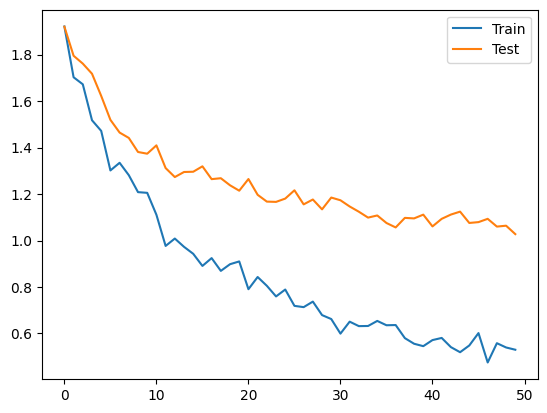

In [83]:
# You want to see train loss and the test loss decrease
# Technically, this is the validation loss
plt.plot(train_losses, color='tab:blue', label='Train')
plt.plot(test_losses, color='tab:orange', label='Test')
plt.legend()

In [84]:
# Print the max gradient of the first layer
# If this is 0 or None, then the gradients aren't flowing
# You have an issue
# Often, this is from dimension mismatching
print(next(model.parameters()).grad.abs().max()) 

tensor(0.1389)


In [ ]:
# evaluate all of the test data
model.eval()
with torch.no_grad():
    y_pred = model(X_test.float().contiguous()).argmax(dim=1)

In [ ]:
# compute the confusion matrix
confmat = confusion_matrix(
    y_test,
    y_pred,
)

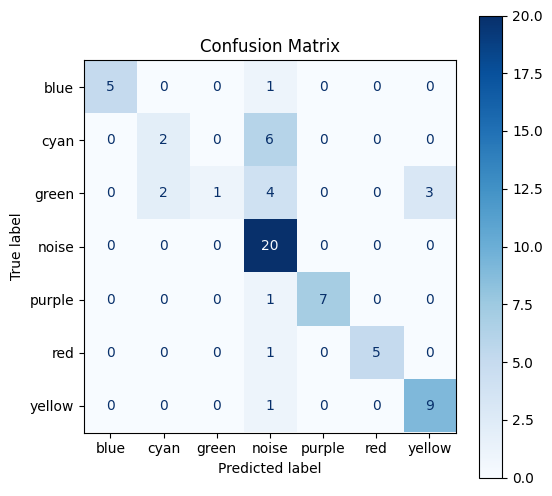

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))
disp = ConfusionMatrixDisplay(confusion_matrix=confmat, display_labels=encoder.classes_)
disp.plot(ax=ax, cmap='Blues')
ax.set_title("Confusion Matrix")
plt.show()

In [ ]:
# TO DO
# Explore some other metrics
# https://scikit-learn.org/stable/api/sklearn.metrics.html


0.7205882352941176

In [ ]:
# TO DO
# Plot the receiver operator curve

## Now, modularize the MyCNN class into `src/zootopia3/models/models.py`

Invoke it in this notebook